# Machine Learning Project
## Classification Task

### About Dataset
#### This dataset offers a variety of attributes valuable for comprehensive analysis. It contains 555,719 instances and 22 attributes, a mix of categorical and numerical data types.
- Trans_date_trans_time: Timestamp of the transaction (date and time).
- Cc_num:Unique customer identification number.
- MerchantThe merchant involved in the transaction.
- Category Transaction type (e.g., personal, childcare).
- Amt:Transaction amount.
- First: Cardholder's first name.
- Last Cardholder's last name.
- Gender: Cardholder's gender.
- Street: Cardholder's street address.
- City: Cardholder's city of residence.
- State: Cardholder's state of residence.
- Zip: Cardholder's zip code.
- Lat:Latitude of cardholder's location.
- Long: Longitude of cardholder's location.
- City_pop:Population of the cardholder's city.
- Job:Cardholder's job title.
- Dob: Cardholder's date of birth.
- Trans_num: Unique transaction identifier.
- Unix_time: Transaction timestamp (Unix format).
- Merch_lat:Merchant's location (latitude).
- Merch_long: Merchant's location (longitude).
- Is_fraud:Fraudulent transaction indicator (1 = fraud, 0 = legitimate). This is the target variable for classification purposes.

### The GOAL is to predict if the transaction is fraud or not.

## Setup

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To Train Model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split


# Notebook Setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Get the Data

- Dataset is available on Kaggle here:
- https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset?select=onlinefoods.csv

In [4]:
fraud = pd.read_csv('fraud.csv', parse_dates=['trans_date_trans_time', 'dob'], index_col=0)

/var/folders/hs/ghq1kglj2js5typ6kb2qg6xm0000gn/T/ipykernel_24033/1584593251.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fraud = pd.read_csv('fraud.csv', parse_dates=['trans_date_trans_time', 'dob'], index_col=0)
/var/folders/hs/ghq1kglj2js5typ6kb2qg6xm0000gn/T/ipykernel_24033/1584593251.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fraud = pd.read_csv('fraud.csv', parse_dates=['trans_date_trans_time', 'dob'], index_col=0)


In [5]:
fraud.shape

(555719, 22)

In [6]:
fraud.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [7]:
fraud.is_fraud.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

In [8]:
df = fraud.copy()

In [9]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
df.merchant.nunique()

693

In [11]:
df.category.nunique()

14

In [12]:
# add age for each customer
from datetime import datetime

current_time = datetime.now()
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (current_time - df['dob']) // pd.Timedelta(days=365.25)

In [13]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,56
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,34
2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,53
3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,36
4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,68


In [14]:
# define a method to count unique number of each variant
def value_counts_plot(df, column, figsize=(4,2), rotation=45):
    print(df[column].value_counts())
    print("-"*50)
    print(f'Number of unique variants: {df[column].nunique()}')
    print("-"*50)
    plt.figure(figsize=figsize)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=rotation)
    plt.show();

merchant
fraud_Kilback LLC                              1859
fraud_Cormier LLC                              1597
fraud_Schumm PLC                               1561
fraud_Kuhn LLC                                 1521
fraud_Dickinson Ltd                            1519
fraud_Boyer PLC                                1506
fraud_Emard Inc                                1226
fraud_Parisian and Sons                        1202
fraud_Corwin-Collins                           1178
fraud_Streich, Hansen and Veum                 1168
fraud_Robel, Cummerata and Prosacco            1165
fraud_Schaefer, McGlynn and Bosco              1163
fraud_Zieme, Bode and Dooley                   1160
fraud_Huels-Hahn                               1157
fraud_Kling Inc                                1154
fraud_Raynor, Feest and Miller                 1152
fraud_Reilly, Heaney and Cole                  1147
fraud_Ledner-Pfannerstill                      1145
fraud_Mraz-Herzog                              1142
fra

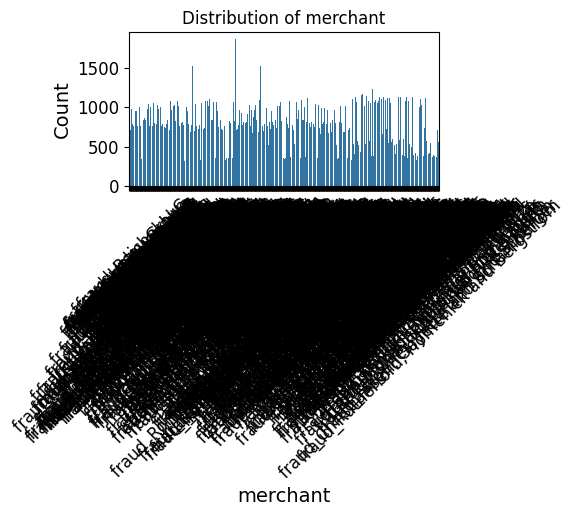

In [15]:
value_counts_plot(df, 'merchant')

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64
--------------------------------------------------
Number of unique variants: 14
--------------------------------------------------


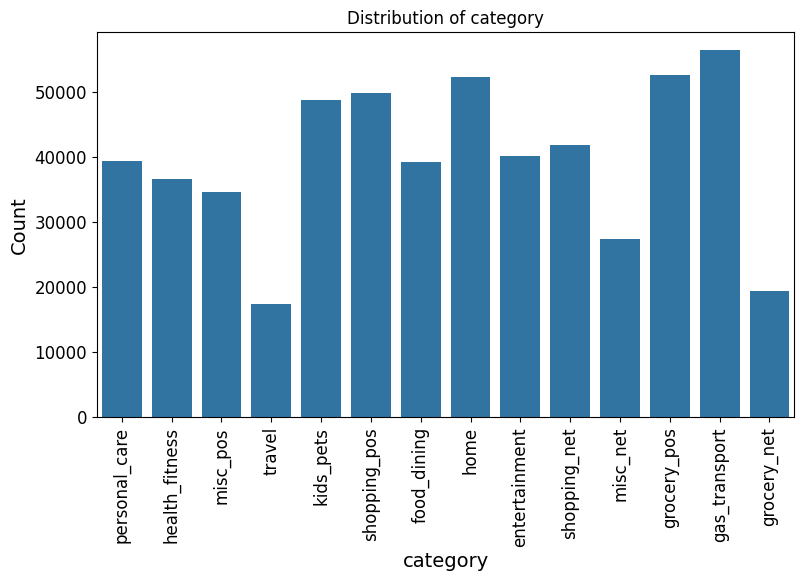

In [16]:
value_counts_plot(df, 'category', figsize=(9,5), rotation=90)

gender
F    304886
M    250833
Name: count, dtype: int64
--------------------------------------------------
Number of unique variants: 2
--------------------------------------------------


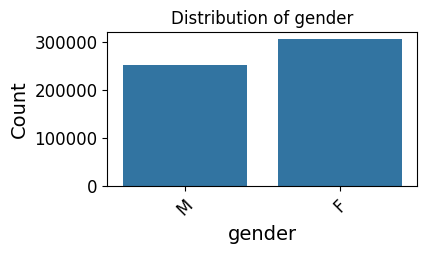

In [17]:
value_counts_plot(df, 'gender')

city
Birmingham                   2423
Meridian                     2229
Phoenix                      2222
Utica                        2204
San Antonio                  2182
Warren                       1985
Cleveland                    1968
Conway                       1961
Thomas                       1937
Fulton                       1864
Brandon                      1800
Indianapolis                 1765
Arcadia                      1754
Houston                      1697
Naples                       1694
Burbank                      1672
Philadelphia                 1596
Fort Washakie                1589
Hudson                       1576
Orient                       1548
Huntsville                   1543
Detroit                      1540
Washington                   1517
Dallas                       1512
Andrews                      1508
Lakeland                     1485
Allentown                    1480
Clarks Mills                 1474
Lahoma                       1470
Edisto Is

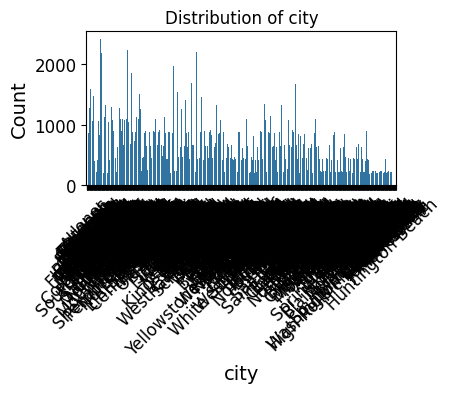

In [18]:
value_counts_plot(df, 'city')

state
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: count, dtype: int64
--------------------------------------------------
Number of unique variants: 50
--------------------------------------------------


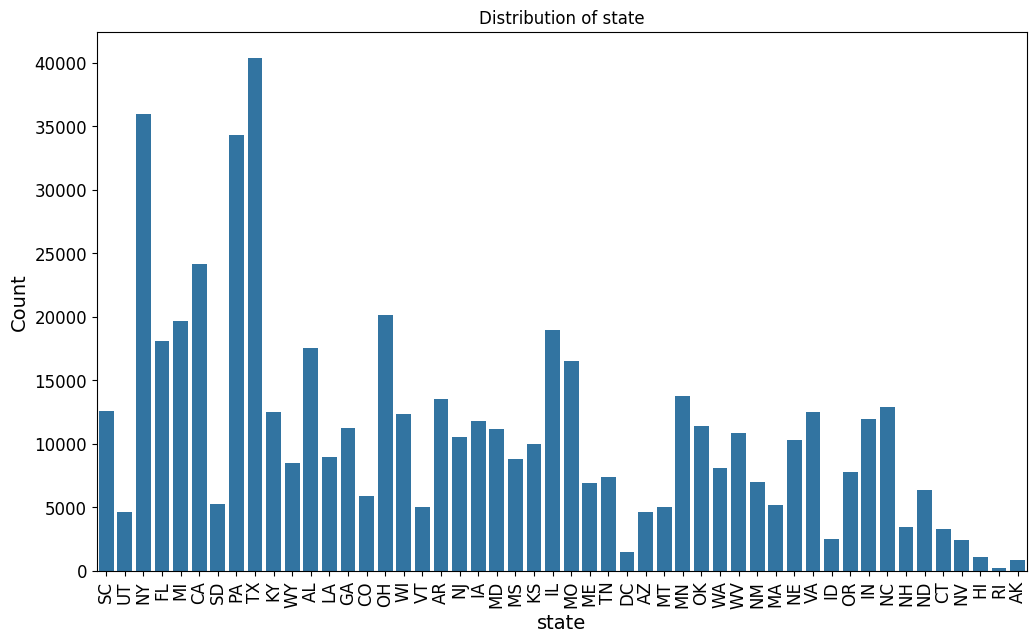

In [19]:
value_counts_plot(df, 'state', figsize=(12,7), rotation=90)

job
Film/video editor                                              4119
Exhibition designer                                            3968
Surveyor, land/geomatics                                       3756
Naval architect                                                3750
Designer, ceramics/pottery                                     3463
Materials engineer                                             3441
Environmental consultant                                       3427
Financial adviser                                              3304
IT trainer                                                     3264
Systems developer                                              3262
Copywriter, advertising                                        3095
Scientist, audiological                                        3060
Chief Executive Officer                                        3027
Chartered public finance accountant                            3001
Magazine features editor                    

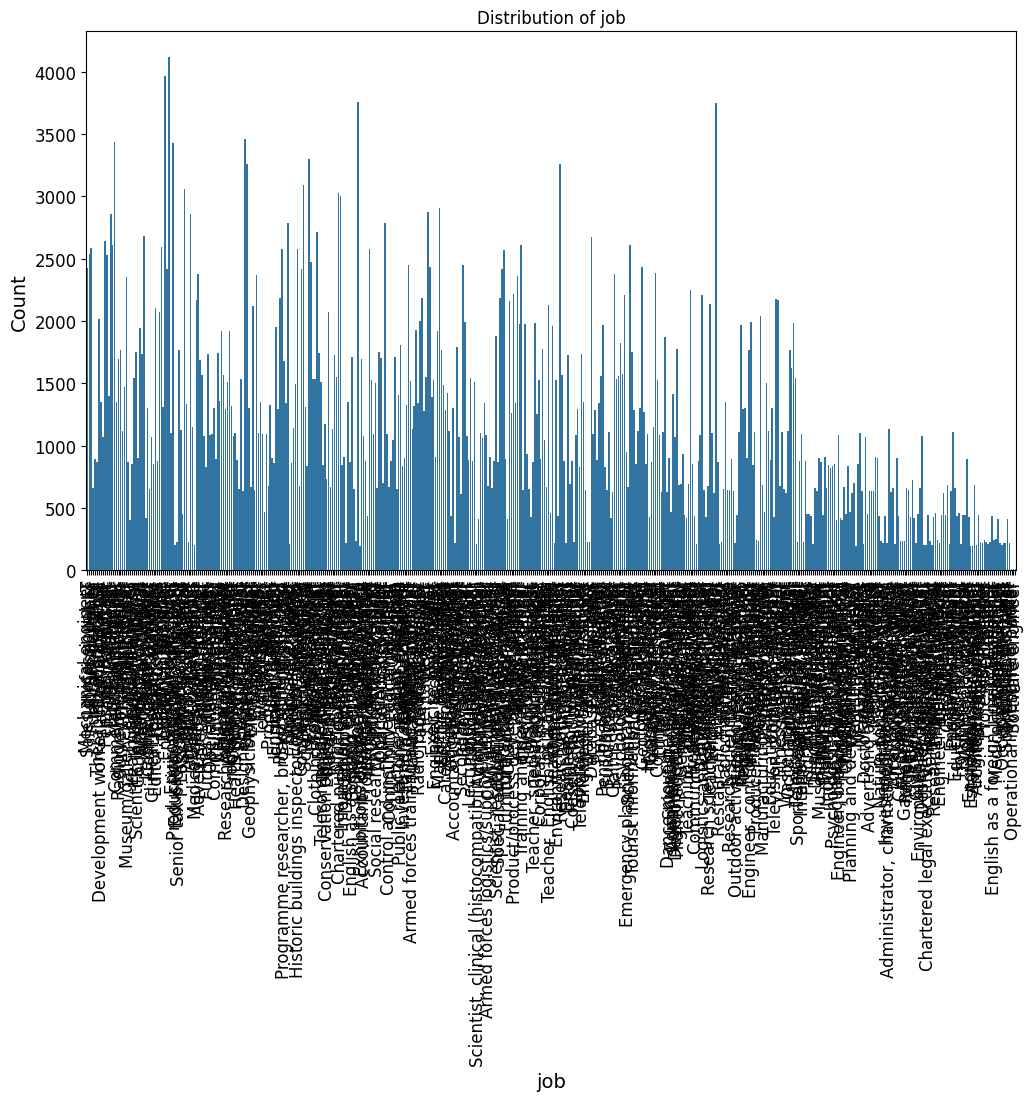

In [20]:
value_counts_plot(df, 'job', figsize=(12,7), rotation=90)

age
39    17848
51    17840
48    17699
36    17003
33    15090
38    14723
52    14484
30    13561
50    13425
47    13380
40    13115
45    12966
35    12685
26    12634
37    12215
49    11624
43    11453
53    10469
64    10435
46    10273
42    10267
62    10073
28     9955
54     9706
34     9616
57     9370
56     9123
24     8393
58     8302
60     8149
68     8084
31     8030
69     7885
55     7165
67     7154
41     7113
78     7110
61     6818
32     6723
59     6185
44     6135
65     5857
29     5778
73     5706
25     4903
71     4610
74     4437
70     4414
75     4180
82     4160
27     4131
66     4032
19     3815
72     3728
83     3680
63     3501
87     3330
23     2974
97     2720
96     2598
94     2557
22     2491
20     2477
88     2431
93     2429
79     2238
89     2180
84     2134
91     2000
76     1969
77     1953
85     1741
95     1512
80     1511
81     1136
92      867
90      643
86      419
99      199
Name: count, dtype: int64
----------------------

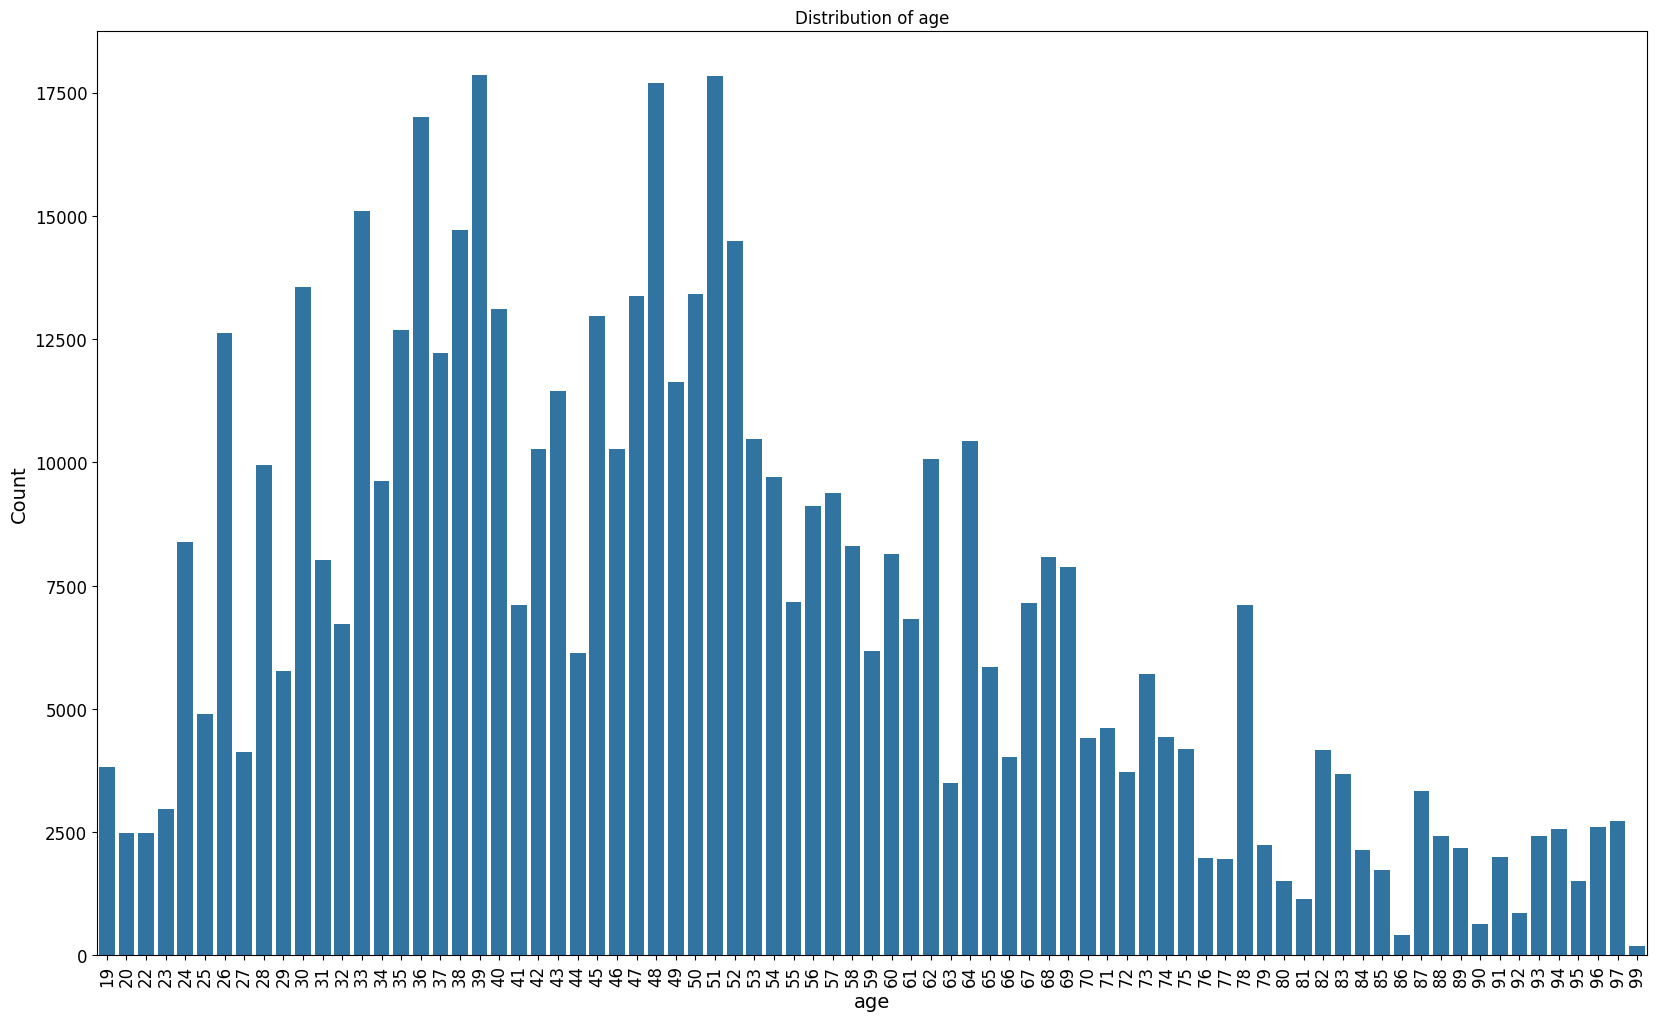

In [21]:
value_counts_plot(df, 'age', figsize=(20,12), rotation=90)

In [22]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,56
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,34
2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,53
3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,36
4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,68


---

# I would like to mention some questions and answer them to get more insight about the dateset.

### 1- Is there any correlation between age and fradulant transaction? I mean in which age group people tend to do fraud?
### 2- Is there any correlation between job and fradulant transaction? I mean if lower income leads to more fraud?
### 3- Is there any correlation between merchant and category and fradulant transaction? I mean is there any specific category or merchant that has potential to scam?
### 4- Is there any correlation between transaction amount and fradulent transaction?
### 5- Is there any correlation between city, state, and population and fradulant transaction? I mean is there any patterns in some specific cities or states?
### 6- Is there any correlation between sex and fraudulent transactions?

---

### 1. Correlation between age and fradulant transaction

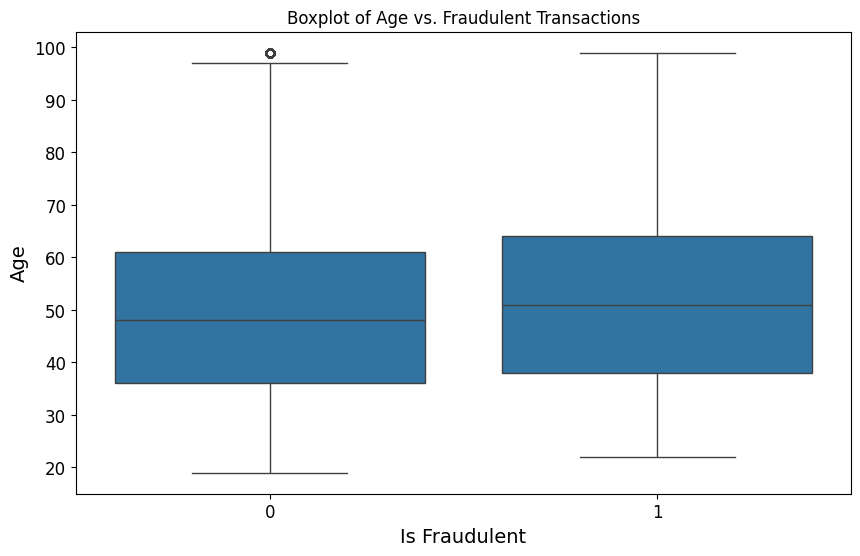

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='age', data=df)
plt.title('Boxplot of Age vs. Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Age')
plt.show()


# it means the average age for customers with fraudulant tendency is more than legitimate transactions

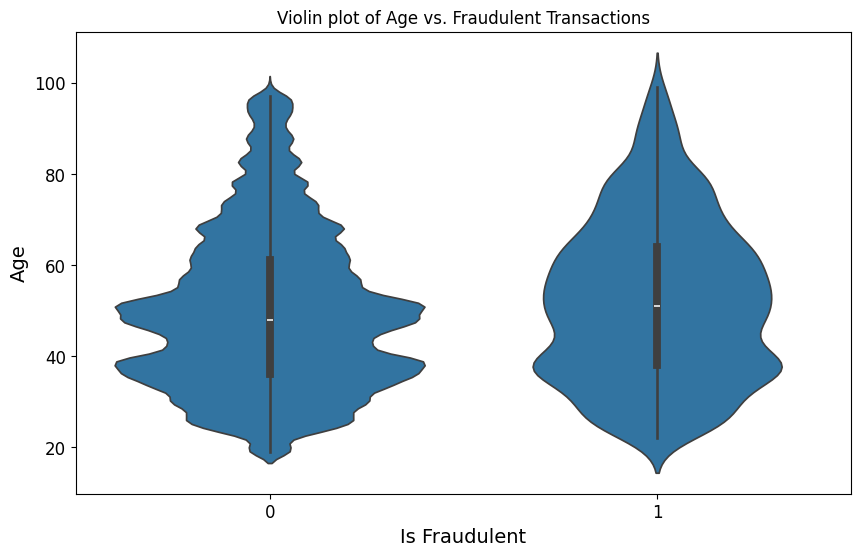

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_fraud', y='age', data=df)
plt.title('Violin plot of Age vs. Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Age')
plt.show()

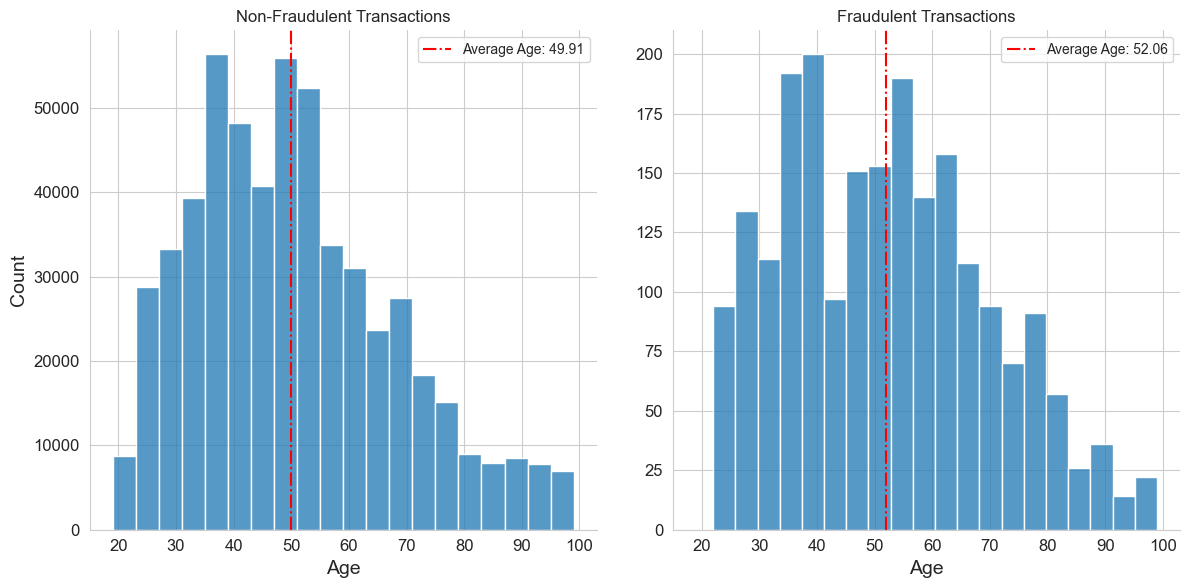

In [25]:
sns.set_style("whitegrid")

# Create a FacetGrid to visualize histograms for fraud and non-fraud transactions separately
g = sns.FacetGrid(df, col="is_fraud", height=6, sharey=False)
g.map(sns.histplot, "age", bins=20)
g.set_axis_labels("Age", "Count")

# Add a vertical line for the average age in each subplot
for ax in g.axes.flat:
    avg_age = df[df['is_fraud'] == int(ax.get_title().split()[-1])]['age'].mean()
    ax.axvline(x=avg_age, color='r', linestyle='-.', label=f'Average Age: {avg_age:.2f}')
    ax.legend()

# Adjust the titles
g.axes[0, 0].set_title("Non-Fraudulent Transactions")
g.axes[0, 1].set_title("Fraudulent Transactions")

# Show the plot
plt.show()

In [26]:
# Perform hypothesis testing to see if there is a significant difference between fradulent and non-fraudulent transactions
from scipy import stats

t_stat, p_value = stats.ttest_ind(df[df['is_fraud'] == 0]['age'], df[df['is_fraud'] == 1]['age'])
print("Hypothesis Testing:")
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("There is a significant difference in age between fraudulent and non-fraudulent transactions.")
else:
    print("There is no significant difference in age between fraudulent and non-fraudulent transactions.")

Hypothesis Testing:
t-statistic: -5.681546196724357
p-value: 1.3354886270380915e-08
There is a significant difference in age between fraudulent and non-fraudulent transactions.


In [27]:
# THIS MEANS AGE IS AN IMPORTANT FEATURE TO PREDICT THE FRAUD TRANSACTION

---

### 2. Correlation between job and fradulant transaction

In [28]:
df.job.nunique()

# there is a lot of unique jobs so I can't measure correlation for each of them
# I want to categorize jobs and measure correlation based on their categories

478

In [29]:
# Define some category mappings
categories = {
    "Engineering": [
        "engineer", "mechanical", "automotive", "electronics", "electrical",
        "control", "instrumentation", "production", "manufacturing", "materials",
        "land", "water", "building", "surveying", "civil", "chemical", "petroleum",
        "aeronautical", "marine", "drilling", "mining", "geotechnical"
        
    ],
    "Healthcare": [
        "doctor", "nurse", "pharmacist", "therapist", "physiotherapist",
        "radiographer", "psychologist", "counsellor", "optician", "dentist",
        "veterinarian", "pathologist", "biochemist", "microbiologist", "Paramedic",
        "Podiatrist", "Chiropodist", "Aid worker", "Occupational hygienist",
        "Exercise physiologist", "Health promotion specialist", "Neurosurgeon",
        "Oncologist", "Embryologist, clinical", "Surgeon", "Acupuncturist", "Psychiatrist",
        "Health and safety adviser", "Osteopath", "Psychiatrist", "Optometrist",
        "Orthoptist", "Pharmacologist"
    ],
    "Science": [
        "scientist", "research", "chemist", "physicist", "geologist", "biologist",
        "ecologist", "geneticist", "immunologist", "toxicologist", "epidemiologist",
        "hydrologist", "oceanographer", "meteorologist", "astronomer", "Herbalist",
        "Scientific laboratory technician", "Herpetologist"
    ],
    "Design": [
        "designer", "graphic", "web", "interior", "spatial", "furniture",
        "ceramics", "jewellery", "textile", "product", "industrial", "exhibition",
        "fashion", "multimedia", "user experience (UX)", "set design",
    ],
    "Education": [
        "teacher", "lecturer", "trainer", "professor", "tutor", "education officer",
        "careers adviser", "learning mentor", "early years", "primary", "secondary",
        "adult", "higher", "further", "special needs", "English language", "librarian"
    ],
    "Business & Finance": [
        "accountant", "financial", "analyst", "investment", "banker", "trader",
        "marketing", "sales", "retail", "buyer", "merchandiser", "insurance",
        "logistics", "human resources", "management consultant", "public relations",
    ],
    "IT & Software": [
        "programmer", "developer", "analyst", "engineer", "software", "web",
        "database", "network", "systems", "security", "data scientist", "IT consultant",
    ],
    "Arts & Media": [
        "artist", "musician", "writer", "editor", "journalist", "photographer",
        "film", "video", "broadcasting", "producer", "director", "camera operator",
        "actor", "dancer", "public relations", "advertising", "curator", "Animator",
        "Illustrator"
    ],
    "Government & Law": [
        "lawyer", "solicitor", "barrister", "police", "firefighter", "immigration",
        "probation", "equality", "diversity", "public affairs", "tax inspector",
        "civil service", "trading standards", "attorney", "officer"
    ],
    "Social Care": [
        "Social worker", "care assistant", "support worker"
    ],
    "Hospitality & Tourism": [
        "Chef, waiter/waitress", "travel agent", "flight attendant"
    ],
    "Construction & Trades": [
        "Plumber", "electrician", "builder", "carpenter", "painter"
    ],
    "Administration & Secretarial": [
        "Secretary", "administrator", "receptionist", "personal assistant"
    ],
    "Customer Service": [
        "Call center representative", "customer service assistant", "Call center manager"
    ],
    "Leisure & Sport": [
        "Leisure center manager, fitness instructor, sports coach"
    ],
    "Charity & Non-Profit": [
        "Charity worker, fundraiser, volunteer coordinator"
    ],
    "Cleaning & Hygiene": [
        "Cleaner", "window cleaner", "laundry worker"
    ],
    "Security": [
        "Security guard","bodyguard", "CCTV operator"
    ],
    "Transport & Logistics": [
        "Driver", "dispatcher", "warehouse operative"
    ],
    "Marketing & Communications": [
        "Marketing manager", "copywriter", "social media manager"
    ],
    "Catering & Food": [
        "Chef", "baker", "waiter/waitress"
    ],
    "Management & C-Level": [
        "Chief", "CEO", "CPO", "COO", "CMO", "manager"
    ],
    "Architecture":[
        "architecture", "architect"
    ],
    "Consultant": [
        "consultant", "consultanting"
    ],
    
    "Other": [], # Catch-all category for uncategorized jobs
}

# Define a function to categorize a job title
def categorize_job(job_title):
  for category, keywords in categories.items():
    for keyword in keywords:
      if keyword.lower() in job_title.lower():
        return category
  return "Other"  # Default category for uncategorized jobs

In [30]:
df['job_category'] = df.job.apply(categorize_job)

In [31]:
df.job_category.nunique()

14

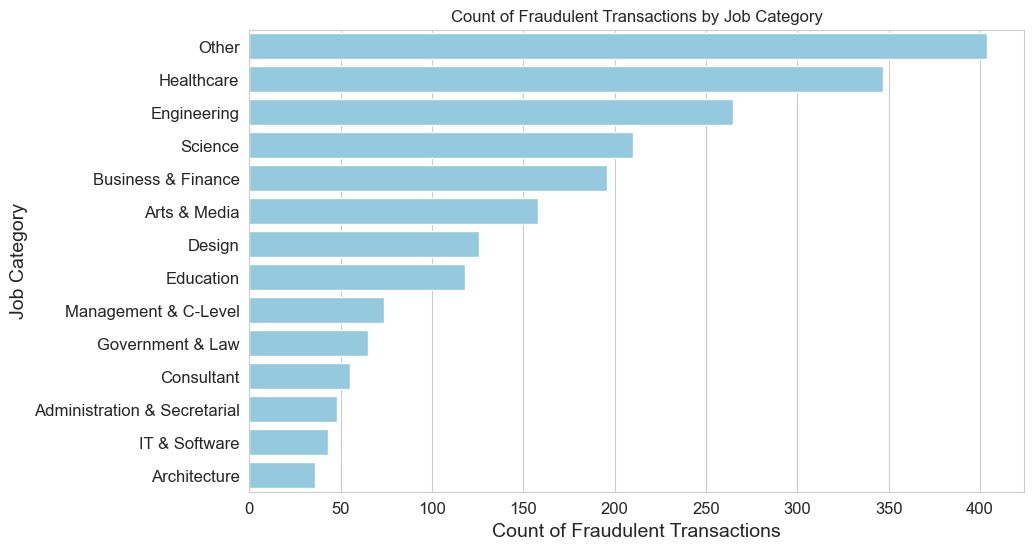

In [32]:
# Calculate the count of fraudulent transactions for each job category
fraud_count = df[df['is_fraud'] == 1].groupby('job_category').size().reset_index(name='fraud_count')

# Sort the DataFrame by the count of fraudulent transactions in descending order
fraud_count_sorted = fraud_count.sort_values(by='fraud_count', ascending=False)

# Bar plot to visualize the count of fraudulent transactions for each job category
plt.figure(figsize=(10, 6))
sns.barplot(y='job_category', x='fraud_count', data=fraud_count_sorted, color='skyblue')
plt.title('Count of Fraudulent Transactions by Job Category')
plt.ylabel('Job Category')
plt.xlabel('Count of Fraudulent Transactions')
plt.show();


# Here is the frequency of fraudulent transactions between job categories
# Which we can see Healthcare, Engineering and Science are the most job catagories that made a fraudulent transaction.

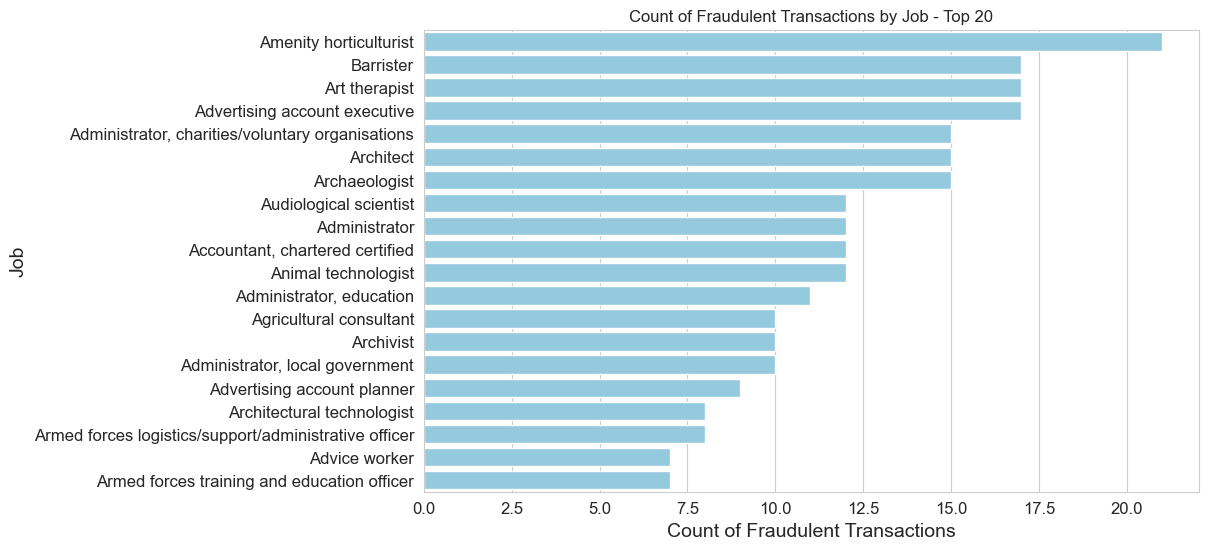

In [33]:
# Calculate the count of fraudulent transactions for each job category
fraud_count = df[df['is_fraud'] == 1].groupby('job').size().reset_index(name='fraud_count').head(20)

# Sort the DataFrame by the count of fraudulent transactions in descending order
fraud_count_sorted = fraud_count.sort_values(by='fraud_count', ascending=False)

# Bar plot to visualize the count of fraudulent transactions for each job category
plt.figure(figsize=(10, 6))
sns.barplot(y='job', x='fraud_count', data=fraud_count_sorted, color='skyblue')
plt.title('Count of Fraudulent Transactions by Job - Top 20')
plt.ylabel('Job')
plt.xlabel('Count of Fraudulent Transactions')
plt.show();

---

### 3.Correlation between Category and Fraudulent Transactions

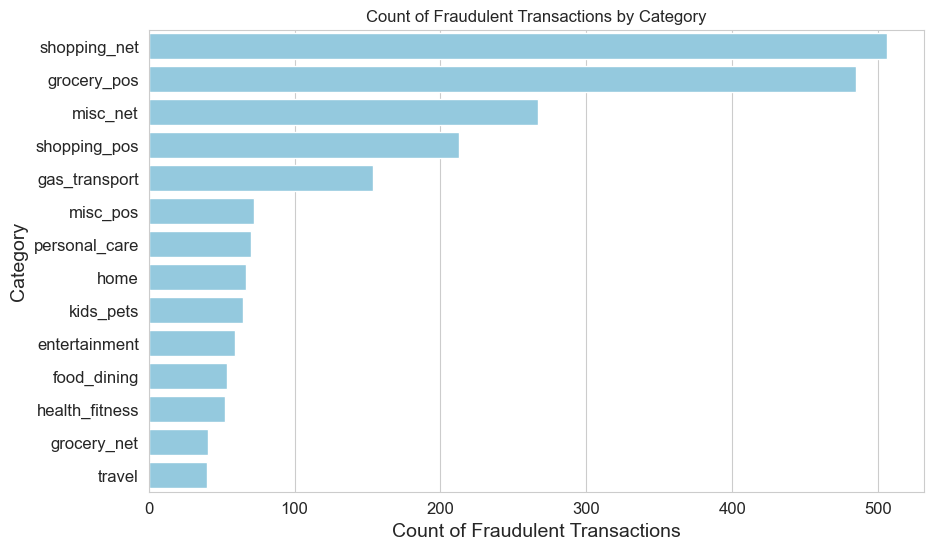

In [34]:
# Calculate the count of fraudulent transactions for each category
fraud_count = df[df['is_fraud'] == 1].groupby('category').size().reset_index(name='fraud_count')

# Sort the DataFrame by the count of fraudulent transactions in descending order
fraud_count_sorted = fraud_count.sort_values(by='fraud_count', ascending=False)

# Bar plot to visualize the count of fraudulent transactions for each job category
plt.figure(figsize=(10, 6))
sns.barplot(y='category', x='fraud_count', data=fraud_count_sorted, color='skyblue')
plt.title('Count of Fraudulent Transactions by Category')
plt.ylabel('Category')
plt.xlabel('Count of Fraudulent Transactions')
plt.show();

---

### 4.Correlation Between Transaction Amount and Fraudulent Transaction

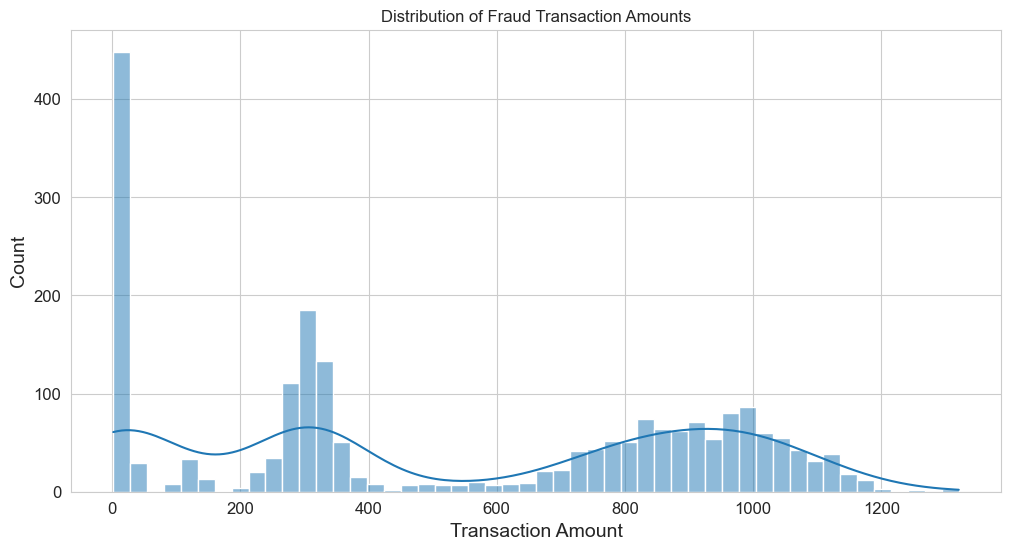

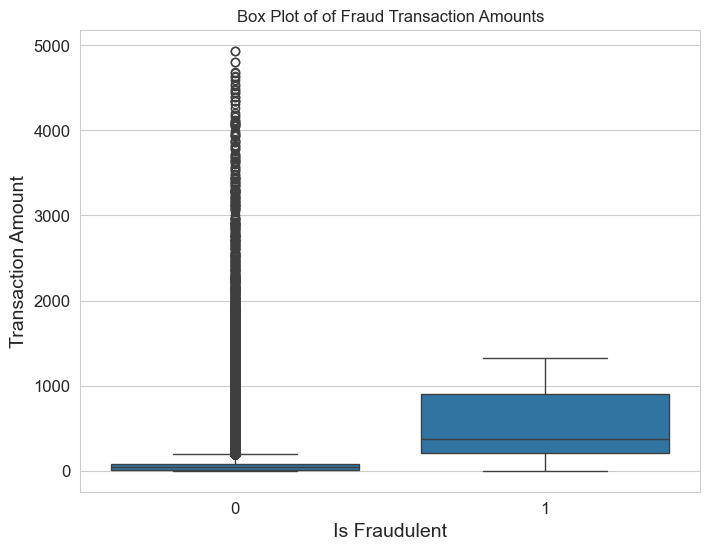

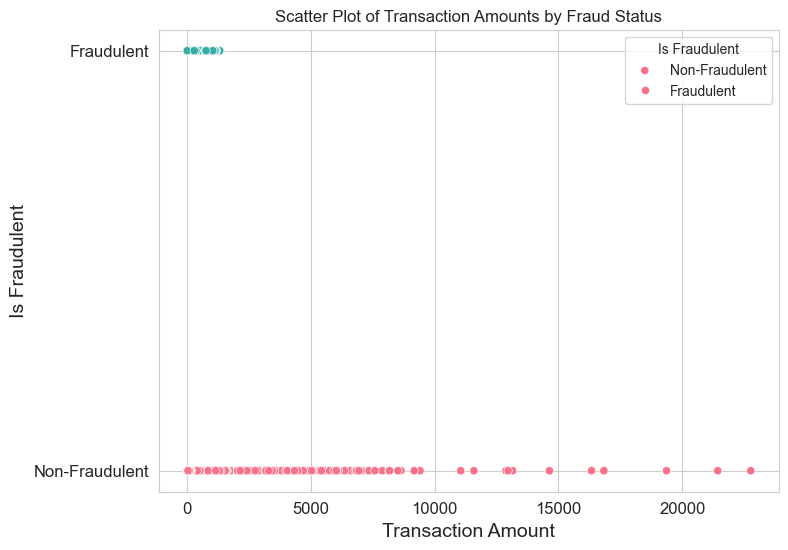

In [35]:
fraudulent_transactions = df[df['is_fraud'] == 1]
non_fraudulent_transactions = df[df['is_fraud'] == 0]

# Distribution Visualization
plt.figure(figsize=(12, 6))
sns.histplot(data=fraudulent_transactions, x='amt', bins=50, kde=True)
plt.title('Distribution of Fraud Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=df[df['amt'] < 5000])
plt.title('Box Plot of of Fraud Transaction Amounts')
plt.xlabel('Is Fraudulent')
plt.ylabel('Transaction Amount')
plt.show()

## Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='amt', y='is_fraud', hue='is_fraud', palette='husl')
plt.title('Scatter Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Is Fraudulent')
plt.yticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.legend(title='Is Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


In [36]:
fraudulent_transactions.describe()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,age
count,2145,2.145000e+03,2145.000000,2145.000000,2145.000000,2145.000000,2.145000e+03,2145,2.145000e+03,2145.000000,2145.000000,2145.0,2145.000000
mean,2020-09-19 10:38:33.566433792,3.854275e+17,528.356494,47862.900233,39.019971,-90.445556,6.452932e+04,1971-09-28 08:04:41.958041960,1.379587e+09,39.018618,-90.465222,1.0,52.057343
min,2020-06-21 22:06:00,6.048700e+10,1.780000,1257.000000,20.082700,-155.488000,2.300000e+01,1924-10-30 00:00:00,1.371852e+09,19.161782,-156.480766,1.0,22.000000
25%,2020-08-06 02:20:00,3.056060e+13,214.510000,23937.000000,34.957200,-96.743000,1.131000e+03,1959-05-28 00:00:00,1.375756e+09,35.017480,-96.697100,1.0,38.000000
50%,2020-09-18 23:41:00,2.358120e+15,371.940000,47987.000000,39.893600,-88.093500,2.870000e+03,1972-11-28 00:00:00,1.379548e+09,39.744929,-88.040722,1.0,51.000000
75%,2020-11-01 23:45:00,4.335530e+15,907.770000,68031.000000,42.180800,-79.785600,1.233500e+04,1986-03-28 00:00:00,1.383350e+09,42.208725,-79.909134,1.0,64.000000
max,2020-12-22 23:13:00,4.989850e+18,1320.920000,99921.000000,55.473200,-67.950300,1.577385e+06,2002-03-17 00:00:00,1.387754e+09,56.214113,-66.960745,1.0,99.000000
std,NaN,1.276313e+18,392.747594,26706.283776,5.076671,14.147521,2.192075e+05,NaN,4.546697e+06,5.093782,14.159252,0.0,17.644393


In [37]:
# obviously it it considerable that fraud transactions occured in lower amounts
# fraud transactions have much lower average of trasactions than legitimate transactions

---

### 5.

<Figure size 2400x1400 with 0 Axes>

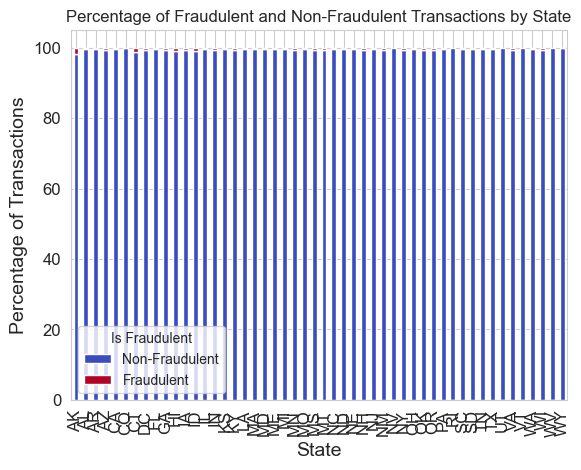

In [38]:
# Calculate the total number of transactions (fraudulent and non-fraudulent) in each state
state_counts = df.groupby(['state', 'is_fraud']).size().unstack(fill_value=0)

# Calculate the percentage of fraudulent and non-fraudulent transactions in each state
state_percentages = state_counts.div(state_counts.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
plt.figure(figsize=(24, 14))
state_percentages.plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('Percentage of Fraudulent and Non-Fraudulent Transactions by State')
plt.xlabel('State')
plt.ylabel('Percentage of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Is Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [39]:
# Calculate the total number of fraudulent transactions in each state
fraud_counts_by_state = pd.DataFrame(df[df['is_fraud'] == 1].groupby(['state', 'city']).size()).sort_values(by=0, ascending=False)

In [40]:
fraud_counts_by_state

,,0
state,city,
KS,Burrton,19
PA,Clarks Mills,18
FL,Jay,16
SC,Bradley,16
ND,Reynolds,16
NY,Chatham,16
NJ,Heislerville,15
CA,Carlotta,15
IL,Lomax,15


---

### 6. Correlation between sex and fraudlent transaction

In [41]:
# Group the DataFrame by 'sex' and 'is_fraud', and calculate the count of transactions
sex_fraud_counts = df.groupby(['gender', 'is_fraud']).size().unstack(fill_value=0)

# Calculate the percentage of fraud committed by each sex
sex_fraud_percentage = (sex_fraud_counts[1] / sex_fraud_counts.sum(axis=1)) * 100

print("Percentage of fraud committed by each sex:")
print(sex_fraud_percentage)

Percentage of fraud committed by each sex:
gender
F    0.381782
M    0.391097
dtype: float64


In [42]:
# Perform the chi-squared test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(sex_fraud_counts)

print("Chi-Squared Statistic:", chi2)
print("P-value:", p)

if p < 0.05:
    print("There is a significant difference in age between fraudulent and non-fraudulent transactions.")
else:
    print("There is no significant difference in age between fraudulent and non-fraudulent transactions.")

Chi-Squared Statistic: 0.28679074899058293
P-value: 0.5922844718406959
There is no significant difference in age between fraudulent and non-fraudulent transactions.


---

# Prepare Dataset for Model Training

In [43]:
fraud = pd.read_csv('fraud.csv', index_col=0)
df = fraud.copy()

df['dob'] = pd.to_datetime(df['dob'], dayfirst=True)
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], dayfirst=True)

#df.columns
#df.dtypes

In [44]:
#### generate some othe features
from geopy.distance import geodesic


# Calculate Age
df['Dob'] = pd.to_datetime(df['dob'])
df['Trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['Age'] = (df['Trans_date_trans_time'] - df['Dob']).dt.days // 365

# Extract Transaction Hour, Day of Week, and Month
df['Transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['Transaction_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['Transaction_month'] = df['trans_date_trans_time'].dt.month

# Calculate Distance to Merchant
df['Distance_to_merchant'] = df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)

# Bin Transaction Amount
bins = [0, 100, 500, 1000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Transaction_amount_bin'] = pd.cut(df['amt'], bins=bins, labels=labels)

# Calculate Transaction Frequency
df['Transaction_frequency'] = df.groupby('cc_num')['cc_num'].transform('count')

# Calculate Transaction Amount per Capita
df['Transaction_amount_per_capita'] = df['amt'] / df['city_pop']

# Calculate Transaction Time Since Last and First Transaction
df['Trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['Transaction_time_since_last'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)
df['Transaction_time_since_first'] = df.groupby('cc_num')['trans_date_trans_time'].transform(lambda x: x - x.min()).dt.total_seconds()

# Calculate Transaction Amount Deviation
df['Transaction_amount_deviation'] = df['amt'] - df.groupby('cc_num')['amt'].transform('mean')

In [45]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Dob,Trans_date_trans_time,Age,Transaction_hour,Transaction_day_of_week,Transaction_month,Distance_to_merchant,Transaction_amount_bin,Transaction_frequency,Transaction_amount_per_capita,Transaction_time_since_last,Transaction_time_since_first,Transaction_amount_deviation
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,1968-03-19,2020-06-21 12:14:00,52,12,6,6,24.613746,Low,640,0.000009,0.0,0.0,-59.033062
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,1990-01-17,2020-06-21 12:14:00,30,12,6,6,104.834043,Low,837,0.098808,0.0,0.0,-23.756523
2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,1970-10-21,2020-06-21 12:14:00,49,12,6,6,59.204796,Low,1073,0.001197,0.0,0.0,-41.773812
3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,1987-07-25,2020-06-21 12:15:00,32,12,6,6,27.615117,Low,663,0.001096,0.0,0.0,0.842474
4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,1955-07-06,2020-06-21 12:15:00,65,12,6,6,104.423175,Low,891,0.002833,0.0,0.0,-52.084501


#### correlation for all features

In [46]:
df.drop(columns=['trans_date_trans_time', 'cc_num','first','last','street','dob','trans_num'],inplace=True)

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
onehot_enc = OneHotEncoder()


df["Transaction_amount_bin"] = ord_enc.fit_transform(df[["Transaction_amount_bin"]])

for column in df.columns:
    if df[column].dtype == 'object':
        encoded_column = onehot_enc.fit_transform(df[[column]]).toarray()
        df[column] = encoded_column

In [50]:
df.shape

(555719, 28)

In [56]:
df.drop(columns=['Dob', 'Trans_date_trans_time'], inplace=True)

In [59]:
corr_matrix = df.corr()
corr_matrix["is_fraud"].sort_values(ascending=False)

is_fraud                         1.000000
amt                              0.182267
Transaction_amount_deviation     0.162098
Transaction_amount_per_capita    0.061739
Transaction_hour                 0.011686
Transaction_day_of_week          0.009365
state                            0.008013
Age                              0.007409
lat                              0.005863
merch_lat                        0.005812
Transaction_amount_bin           0.004608
Distance_to_merchant             0.000239
gender                          -0.000748
long                            -0.000972
merch_long                      -0.001060
city                            -0.001205
merchant                        -0.001604
job                             -0.001724
zip                             -0.002271
city_pop                        -0.004910
Transaction_time_since_last     -0.010536
category                        -0.010743
Transaction_month               -0.011748
unix_time                       -0

In [359]:
# Our target variable is imbalanced, so I'll resampling the dataset to balance the training set.
df.is_fraud.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [61]:
dataframe = df.copy()

In [62]:
#columns_to_drop = ['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'dob']
#
#dataframe = dataframe.drop(columns_to_drop, axis=1)

In [67]:
dataframe.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,Age,Transaction_hour,Transaction_day_of_week,Transaction_month,Distance_to_merchant,Transaction_amount_bin,Transaction_frequency,Transaction_amount_per_capita,Transaction_time_since_last,Transaction_time_since_first,Transaction_amount_deviation
0,0.0,0.0,2.86,0.0,0.0,0.0,29209,33.9659,-80.9355,333497,0.0,1371816865,33.986391,-81.200714,0,52,12,6,6,24.613746,1.0,640,0.000009,0.0,0.0,-59.033062
1,0.0,0.0,29.84,1.0,0.0,0.0,84002,40.3207,-110.4360,302,0.0,1371816873,39.450498,-109.960431,0,30,12,6,6,104.834043,1.0,837,0.098808,0.0,0.0,-23.756523
2,0.0,0.0,41.28,1.0,0.0,0.0,11710,40.6729,-73.5365,34496,0.0,1371816893,40.495810,-74.196111,0,49,12,6,6,59.204796,1.0,1073,0.001197,0.0,0.0,-41.773812
3,0.0,0.0,60.05,0.0,0.0,0.0,32780,28.5697,-80.8191,54767,0.0,1371816915,28.812398,-80.883061,0,32,12,6,6,27.615117,1.0,663,0.001096,0.0,0.0,0.842474
4,0.0,0.0,3.19,0.0,0.0,0.0,49632,44.2529,-85.0170,1126,0.0,1371816917,44.959148,-85.884734,0,65,12,6,6,104.423175,1.0,891,0.002833,0.0,0.0,-52.084501


### Pipeline

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


X = dataframe.drop('is_fraud', axis=1)  # Features
y = dataframe['is_fraud']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define Numerical Processing Steps
#numerical_columns = dataframe.select_dtypes(include=['int', 'float']).columns.tolist()
#
#numerical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')),
#    ('scaler', StandardScaler())
#])
#
## Define Categorical Processing Steps
#categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
#
#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))
#])
#
## Create Column Transformer
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numerical_transformer, numerical_columns),
#        ('cat', categorical_transformer, categorical_columns)
#])

In [73]:
# Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Model Selection

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model_rfc = RandomForestClassifier()

### Logistic Regression

In [83]:
# Create the Pipeline with Custom Step for Logistic Regression
#pipeline = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('model', model_lr)
#])

model_lr.fit(X_train_resampled, y_train_resampled)
y_pred = model_lr.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71    110718
           1       0.00      0.53      0.01       426

    accuracy                           0.55    111144
   macro avg       0.50      0.54      0.36    111144
weighted avg       0.99      0.55      0.71    111144

[[60838 49880]
 [  199   227]]


### Decision Tree Classifier

In [84]:
model_dt.fit(X_train_resampled, y_train_resampled)
y_pred = model_dt.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.35      0.64      0.46       426

    accuracy                           0.99    111144
   macro avg       0.68      0.82      0.73    111144
weighted avg       1.00      0.99      0.99    111144

[[110223    495]
 [   154    272]]


### Random Forest Classifier

In [85]:
model_rfc.fit(X_train_resampled, y_train_resampled)
y_pred = model_rfc.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.76      0.70      0.73       426

    accuracy                           1.00    111144
   macro avg       0.88      0.85      0.86    111144
weighted avg       1.00      1.00      1.00    111144

[[110622     96]
 [   128    298]]
